In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [141]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635


In [114]:
print("no. of rows:", df.shape[0])
print("no. of columns:", df.shape[1])

no. of rows: 729322
no. of columns: 11


In [115]:
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [116]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [142]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [143]:
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [144]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [145]:
df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

In [121]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


In [146]:
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
# for Drop_off
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [147]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,400.0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,1100.0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,1635.0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1141.0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,848.0,17,6,2,17,6,2


In [ ]:
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count
plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

In [148]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

In [149]:
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [150]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: count, dtype: int64

In [151]:
df['trip_duration'].describe()/3600

count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

/tmp/ipykernel_3996/2122223676.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_trip_duration'], kde = False, bins = 200)


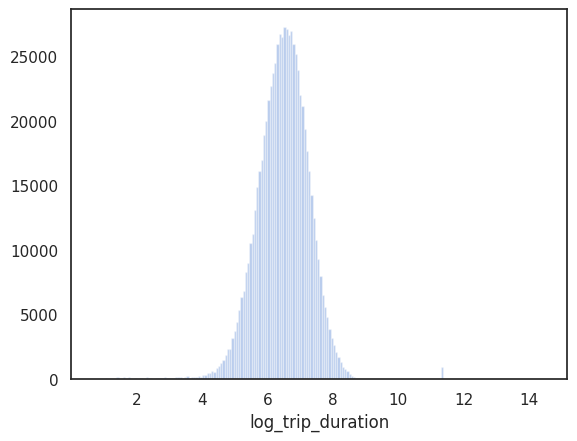

In [50]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

In [152]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,400.0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,1100.0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,1635.0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1141.0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,848.0,17,6,2,17,6,2


In [153]:
df.shape

(729287, 18)

/tmp/ipykernel_3996/2461740450.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
/tmp/ipykernel_3996/2461740450.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_longitude'].values, label =

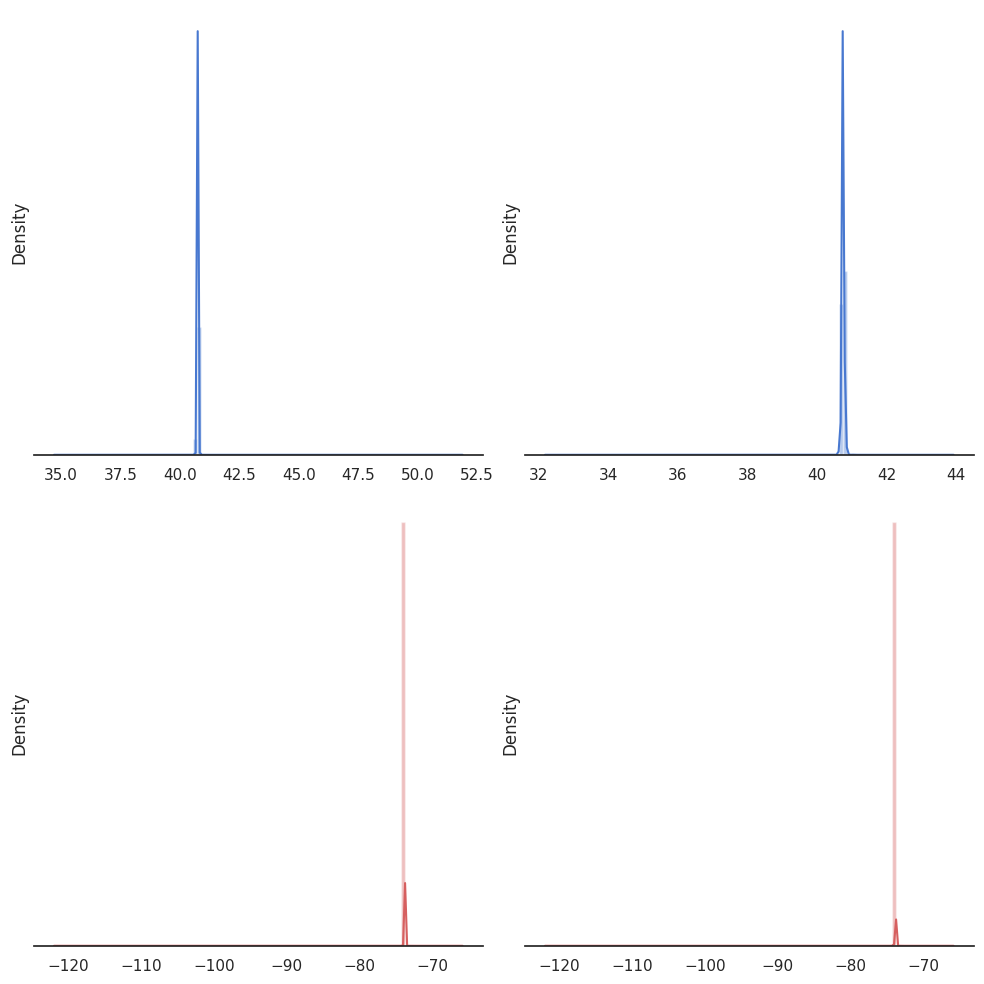

In [154]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

/tmp/ipykernel_3996/269281323.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
/tmp/ipykernel_3996/269281323.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_data_new['pickup_longitude'

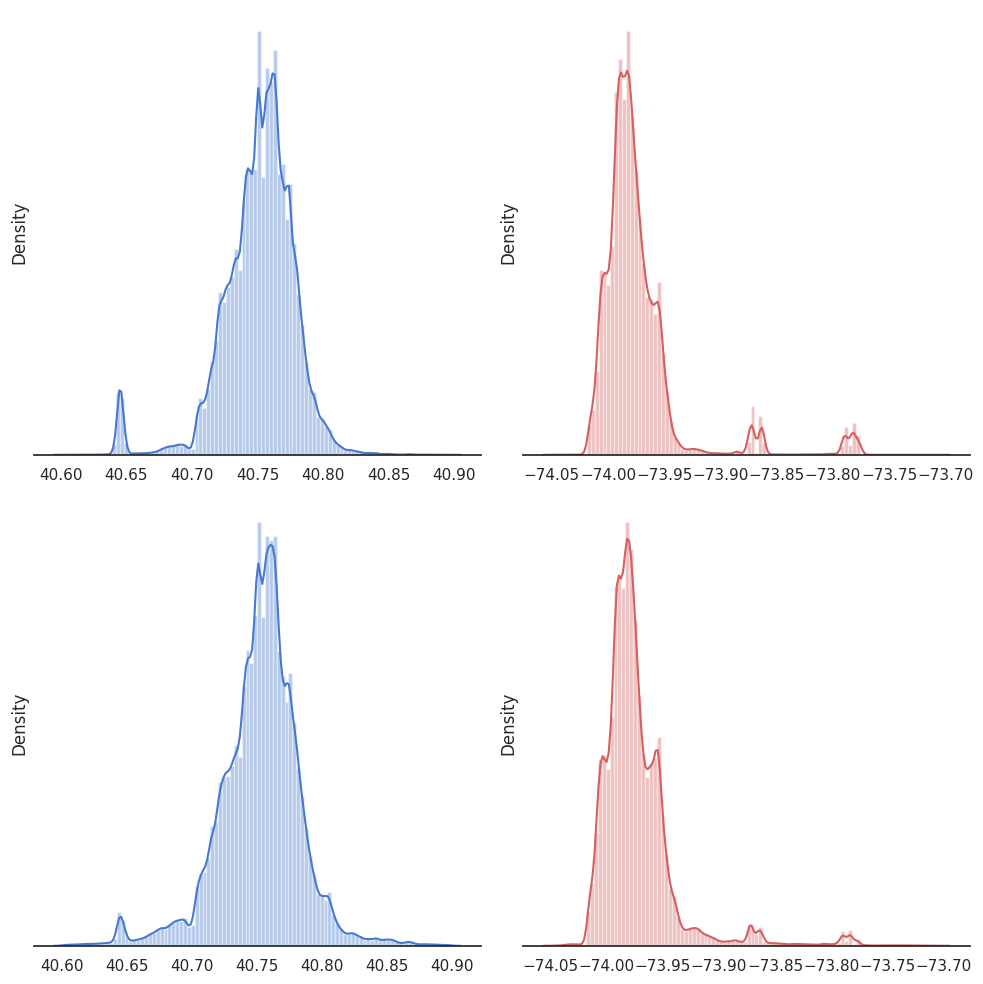

In [155]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [100]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'pickup_day', 'pickup_hour',
       'pickup_weekday', 'dropoff_day', 'dropoff_hour', 'dropoff_weekday'],
      dtype='object')

In [ ]:
sns.barplot(x="vendor_id", y="trip_duration",data=df);
plt.title("Average Trip Duration (In seconds)");
plt.xlabel("Vendor Id");
plt.ylabel("Trip Duration");

In [156]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude',
                       'dropoff_longitude','dropoff_latitude','trip_duration'])

In [ ]:
plt.figure(figsize=(12, 6))
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
#corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In [157]:
df1.head(4)

,vendor_id,passenger_count,store_and_fwd_flag,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,2,1,N,400.0,29,16,0,29,16,0
1,1,2,N,1100.0,11,23,4,11,23,4
2,2,2,N,1635.0,21,17,6,21,18,6
3,2,6,N,1141.0,5,9,1,5,10,1


In [158]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
df1['store_and_fwd_flag']=LabelEncoder.fit_transform(df1['store_and_fwd_flag'])

In [159]:
df1.head(4)

,vendor_id,passenger_count,store_and_fwd_flag,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,2,1,0,400.0,29,16,0,29,16,0
1,1,2,0,1100.0,11,23,4,11,23,4
2,2,2,0,1635.0,21,17,6,21,18,6
3,2,6,0,1141.0,5,9,1,5,10,1


In [160]:
import numpy as np
import pandas as pd

# Replace infinities with NaN
df1 = df1.replace([np.inf, -np.inf], np.nan)

# Drop or fill NaN values
df1 = df1.dropna()   # or df.fillna(0), depending on your case


In [161]:
x=df1
y=df['trip_duration']

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR

In [164]:
KNN=KNN(n_neighbors=5)
DTR=DTR(random_state=42)
RFR=RFR(n_estimators=100, random_state=42)

In [163]:
x_train

,vendor_id,passenger_count,store_and_fwd_flag,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
586064,2,1,0,1505.0,13,8,2,13,9,2
507170,2,1,0,177.0,19,9,1,19,9,1
683243,2,2,0,299.0,18,20,0,18,20,0
37818,1,1,0,388.0,5,7,4,5,7,4
551306,1,2,0,402.0,14,18,1,14,18,1
...,...,...,...,...,...,...,...,...,...,...
260321,2,1,0,254.0,22,18,6,22,18,6
367457,2,3,0,244.0,18,23,4,18,23,4
132500,1,1,0,431.0,27,22,2,27,22,2
674101,2,2,0,1158.0,7,17,3,7,17,3


In [165]:
KNN.fit(x_train, y_train)
DTR.fit(x_train, y_train)
RFR.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [168]:
models = {"KNN": KNN, "Decision Tree": DTR, "Random Forest": RFR}

for name, model in models.items():
    # predictions and ground truth (inverse-transform)
    y_pred = np.expm1(np.clip(model.predict(x_test), -20, 20))
    y_true = np.expm1(np.clip(y_test, -20, 20))
    
    # evaluation
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print(f"{name}: RMSE = {rmse:.2f}, R2 = {r2:.4f}")


KNN: RMSE = 2887028.47, R2 = 0.9835
Decision Tree: RMSE = 0.00, R2 = 1.0000
Random Forest: RMSE = 0.00, R2 = 1.0000


In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train/test split BEFORE log-transform inverse
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Initialize models
KNN = KNeighborsRegressor(n_neighbors=5)
DTR = DecisionTreeRegressor(random_state=42)
RFR = RandomForestRegressor(n_estimators=100, random_state=42)

models = {"KNN": KNN, "Decision Tree": DTR, "Random Forest": RFR}

for name, model in models.items():
    # Fit on training data
    model.fit(x_train, y_train)

    # Predict and inverse transform safely
    y_pred = np.expm1(np.clip(model.predict(x_test), -20, 20))
    y_true = np.expm1(np.clip(y_test, -20, 20))

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{name}: RMSE = {rmse:.2f}, R2 = {r2:.4f}")


KNN: RMSE = 2887028.47, R2 = 0.9835
Decision Tree: RMSE = 0.00, R2 = 1.0000
Random Forest: RMSE = 0.00, R2 = 1.0000


In [172]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = np.expm1(np.clip(model.predict(x_test), -20, 20))
    y_true = np.expm1(np.clip(y_test, -20, 20))

    print(f"\n{name} sample predictions:")
    print("y_pred:", y_pred[:10])
    print("y_true:", y_true[:10])



KNN sample predictions:
y_pred: [4.85165194e+08 4.85165194e+08 4.85165194e+08 4.85165194e+08
 4.85165194e+08 4.85165194e+08 4.85165194e+08 4.85165194e+08
 4.85165194e+08 4.85165194e+08]
y_true: 718521    4.851652e+08
34477     4.851652e+08
632016    4.851652e+08
410754    4.851652e+08
665337    4.851652e+08
393924    4.851652e+08
490867    4.851652e+08
583548    4.851652e+08
566644    4.851652e+08
32527     4.851652e+08
Name: trip_duration, dtype: float64

Decision Tree sample predictions:
y_pred: [4.85165194e+08 4.85165194e+08 4.85165194e+08 4.85165194e+08
 4.85165194e+08 4.85165194e+08 4.85165194e+08 4.85165194e+08
 4.85165194e+08 4.85165194e+08]
y_true: 718521    4.851652e+08
34477     4.851652e+08
632016    4.851652e+08
410754    4.851652e+08
665337    4.851652e+08
393924    4.851652e+08
490867    4.851652e+08
583548    4.851652e+08
566644    4.851652e+08
32527     4.851652e+08
Name: trip_duration, dtype: float64

Random Forest sample predictions:
y_pred: [4.85165194e+08 4.8516519